# CNN CIFAR-10 Classification

Neste notebook vamos utilizar o conjunto de dados [CIFAR-10](https://en.wikipedia.org/wiki/CIFAR-10), uma coleção de imagens comumente usadas para treinar algoritmos de machine learning e visão computacional.

O conjunto de dados CIFAR-10 contém 60.000 imagens coloridas de 32x32 em 10 classes diferentes. As 10 classes diferentes representam aviões, carros, pássaros, gatos, veados, cães, sapos, cavalos, navios e caminhões. São 6.000 imagens de cada classe.

Usaremos uma [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) para solucionar este problema de classificação.

Começamos então importando as bibliotecas necessárias:

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

Carregamos os conjuntos de treinamento e teste:

In [2]:
transformer_train = torchvision.transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    torchvision.transforms.RandomHorizontalFlip(p=0.5),
    torchvision.transforms.RandomAffine(0, translate=(0.1, 0.1)),
    transforms.ToTensor(),                                            
])

train_dataset = torchvision.datasets.CIFAR10(
    root = '.',
    train = True,
    transform = transformer_train,
    download = True
)

test_dataset = torchvision.datasets.CIFAR10(
    root = '.',
    train = False,
    transform = transforms.ToTensor(),
    download = True
)


Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


A seguir podemos imprimir os dados para termos uma ideia do que estamos trabalhando (veja que se trata de arrays NumPy):

In [3]:
print(train_dataset.data)
print(type(train_dataset.data))

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

Perceba que dessa vez estamos trabalhando com imagens coloridas, então temos 3 dimensões:

In [4]:
train_dataset.data.shape

(50000, 32, 32, 3)

Vejamos os **targets** (valores que desejamos prever):

In [5]:
print(train_dataset.targets)

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

A seguir confirmamos o número de classes que estamos trabalhando:

In [6]:
K = len(set(train_dataset.targets))
print(f"Número de classes: {K}")

Número de classes: 10


Definimos o **DataLoader** que irá gerar batches automaticamente no loop de treinamento e cuida também do embaralhamento:

In [7]:
batch_size = 128

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Também faremos um **DataLoader** para testes:

In [8]:
train_dataset_fixed = torchvision.datasets.CIFAR10(
    root = '.',
    train = True,
    transform = transforms.ToTensor(),
    download = True
)

train_loader_fixed = torch.utils.data.DataLoader(dataset=train_dataset_fixed, batch_size=batch_size, shuffle=False)

Files already downloaded and verified


O transformador de dados mapeou os dados para (0, 1) e também moveu o canal de cor antes da altura / largura:

In [9]:
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1, shuffle=True)

for x, y in tmp_loader:
    print(x)
    print(x.shape)
    break

tensor([[[[0.1333, 0.1373, 0.1608,  ..., 0.5412, 0.3176, 0.2902],
          [0.1569, 0.1882, 0.1961,  ..., 0.3725, 0.3608, 0.3333],
          [0.1922, 0.2196, 0.2235,  ..., 0.2902, 0.3412, 0.3216],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.1569, 0.1725, 0.2078,  ..., 0.5961, 0.3686, 0.3216],
          [0.1804, 0.2235, 0.2431,  ..., 0.3882, 0.3804, 0.3529],
          [0.2118, 0.2549, 0.2706,  ..., 0.3020, 0.3529, 0.3373],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0627, 0.0824, 0.1176,  ..., 0.5451, 0.2627, 0.1922],
          [0.0902, 0.1412, 0.1647,  ..., 0.3020, 0.2667, 0.2196],
          [0.1294, 0.1804, 0.2000,  ..., 0

Finalmente construímos o nosso modelo:

In [10]:
class CNN(nn.Module):
    def __init__(self, K):
    super(CNN, self).__init__()

    # defines as conv layers
    self.conv1 = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.Conv2d(32, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(2),
    )
    self.conv2 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.Conv2d(64, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2),
    )
    self.conv3 = nn.Sequential(
        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.Conv2d(128, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2),
    )

    # define as layers lineares
    self.fc1 = nn.Linear(128 * 4 * 4, 1024)
    self.fc2 = nn.Linear(1024, K)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)
        x = F.dropout(x, p=0.5)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.2)
        x = self.fc2(x)
        return x

Instanciamos o modelo:

In [11]:
model = CNN(K)

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel

Definimos a função Loss e o Optimizer:

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

Criamos uma função para encapsular o loop de treinamento do modelo:

In [14]:
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for it in range(epochs):
        model.train()
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            # move o modelo para o dispositivo de processamento
            inputs, targets = inputs.to(device), targets.to(device)

            # zera os parâmetros do gradient
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward and optimize
            loss.backward()
            optimizer.step()

            train_loss.append(loss.item())

        # Obtém o loss de treinamento e teste
        train_loss = np.mean(train_loss)

        model.eval()
        test_loss = []
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)

        # Salva os losses
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        dt = datetime.now() - t0
        print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
          Test Loss: {test_loss:.4f}, Duration: {dt}')
  
    return train_losses, test_losses

Treinamos o modelo:

In [15]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs=80)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 1/80, Train Loss: 1.4421,       Test Loss: 1.0894, Duration: 0:00:22.545783
Epoch 2/80, Train Loss: 1.0061,       Test Loss: 0.8884, Duration: 0:00:21.967509
Epoch 3/80, Train Loss: 0.8495,       Test Loss: 0.7884, Duration: 0:00:21.892620
Epoch 4/80, Train Loss: 0.7676,       Test Loss: 0.7417, Duration: 0:00:21.813418
Epoch 5/80, Train Loss: 0.6970,       Test Loss: 0.9292, Duration: 0:00:21.993825
Epoch 6/80, Train Loss: 0.6576,       Test Loss: 0.6048, Duration: 0:00:21.960271
Epoch 7/80, Train Loss: 0.6133,       Test Loss: 0.6172, Duration: 0:00:21.957137
Epoch 8/80, Train Loss: 0.5912,       Test Loss: 0.5838, Duration: 0:00:21.903931
Epoch 9/80, Train Loss: 0.5582,       Test Loss: 0.5586, Duration: 0:00:21.943268
Epoch 10/80, Train Loss: 0.5346,       Test Loss: 0.6156, Duration: 0:00:21.989012
Epoch 11/80, Train Loss: 0.5130,       Test Loss: 0.5381, Duration: 0:00:21.967862
Epoch 12/80, Train Loss: 0.4944,       Test Loss: 0.5449, Duration: 0:00:21.940644
Epoch 13/80, 

Plotamos a loss de treinamento e teste por iteração:

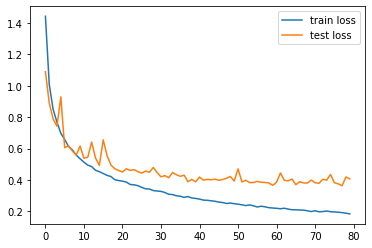

In [16]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend();

Calculamos a **Accuracy** para treinamento e teste:

In [17]:
model.eval()

n_correct = 0.
n_total = 0.
for inputs, targets in train_loader_fixed:
    # Movemos o modelo para o dispositivo de processamento
    inputs, targets = inputs.to(device), targets.to(device)

    # Forward pass
    outputs = model(inputs)

    # Obtemos previsões
    # torch.max retorna amobs max e argmax
    _, predictions = torch.max(outputs, 1)

    # Atualiza os contadores
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

train_acc = n_correct / n_total

n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
    # Movemos o modelo para o dispositivo de processamento
    inputs, targets = inputs.to(device), targets.to(device)

    # Forward pass
    outputs = model(inputs)

    # Obtemos previsões
    # torch.max retorna amobs max e argmax
    _, predictions = torch.max(outputs, 1)

    # Atualiza os contadores
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9532, Test acc: 0.8883


Definimos uma função para plotar a matriz de confusão:

In [18]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Obtemos todas as previsões em um array e plotamos a matriz de confusão:

Confusion matrix, without normalization
[[886  11   8  15   6   2   3   6  55   8]
 [  7 966   0   1   0   0   0   0   1  25]
 [ 35   1 836  37  33  24  12  10   8   4]
 [ 12   2  21 803  41  69  15  18  12   7]
 [  6   1  22  20 895  20   9  22   5   0]
 [  7   4  12 113  25 814   3  20   1   1]
 [  7   3  43  35  19  10 877   3   2   1]
 [  9   2  10  23  20  25   3 905   1   2]
 [ 21  12   1   5   0   0   2   1 948  10]
 [ 14  51   0   3   1   0   1   2  18 910]]


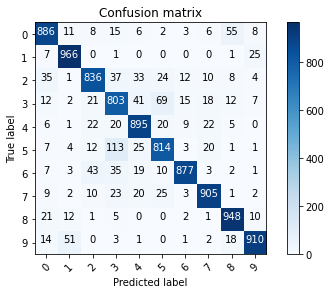

In [19]:
x_test = test_dataset.data
y_test = np.array(test_dataset.targets)
p_test = np.array([])
for inputs, targets in test_loader:
    # Movemos o modelo para o dispositivo de processamento
    inputs, targets = inputs.to(device), targets.to(device)
    # Forward pass
    outputs = model(inputs)
    # Obtemos previsões
    _, predictions = torch.max(outputs, 1)
    # Atualizamos p_test
    p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

A seguir vamos definir uma string com as respectivas labels de cada classe:

In [21]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Apresentamos algumas amostras que foram classificadas incorretamente:

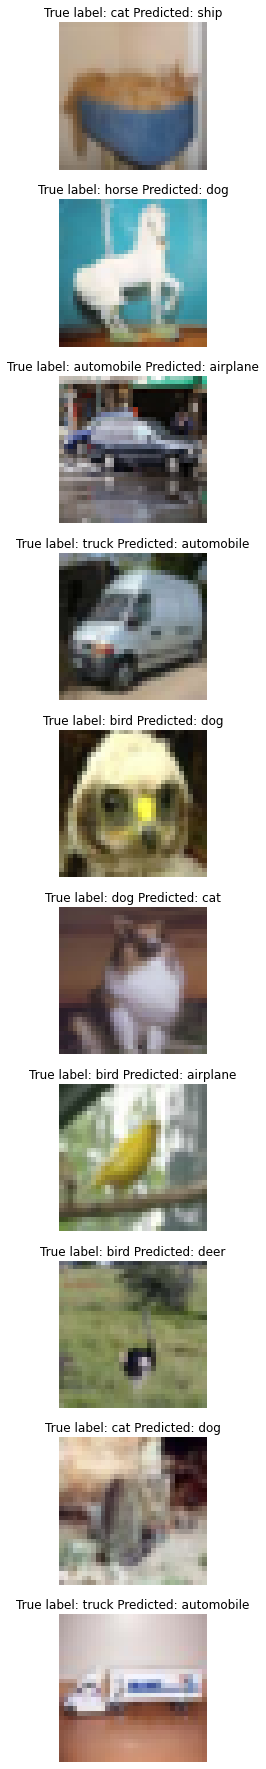

In [22]:
p_test = p_test.astype(np.uint8)
misclassified_idx = np.where(p_test != y_test)[0]
sample_idx = np.random.choice(misclassified_idx, 10, replace=False)
plt.figure(figsize=(32,32))
for j, i in enumerate(sample_idx):
    plt.subplot(10, 1, j + 1)
    plt.axis('off')
    plt.imshow(x_test[i].reshape(32,32,3))
    plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

Finalmente, mostramos o sumário de nosso modelo:

In [23]:
from torchsummary import summary
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]           9,248
              ReLU-5           [-1, 32, 32, 32]               0
       BatchNorm2d-6           [-1, 32, 32, 32]              64
         MaxPool2d-7           [-1, 32, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          18,496
              ReLU-9           [-1, 64, 16, 16]               0
      BatchNorm2d-10           [-1, 64, 16, 16]             128
           Conv2d-11           [-1, 64, 16, 16]          36,928
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
        MaxPool2d-14             [-1, 6